In [2]:
# Import necessary libraries
import pandas as pd
import zipfile
import json
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# The analysis of StackOverflow Data

In [3]:
# Specify the path to the zipped survey CSV file
zip_file_path = '../../assets/so/raw/survey_results.zip'

# Load CSV into DataFrame directly from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the name of the CSV file within the zip archive
    csv_file_name = [name for name in zip_ref.namelist() if name.endswith('.csv')][0]
    
    # Read the CSV file directly into a DataFrame
    with zip_ref.open(csv_file_name) as csv_file:
        # Use pandas to read the CSV data into a DataFrame
        df = pd.read_csv(csv_file)

# Display basic information about the loaded DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [4]:
# Load language config file
def load_lang_config():
    with open("../../assets/config.json", "r") as config_file:
        config = json.load(config_file)
    return config

DEFAULT_LANGUAGES = list(load_lang_config()["languages"].keys())

In [5]:
# Cleaning DataFrame
# 1. Select only the language our platform supports
# 2. Remove unwanted rows with NaN
# 3. Remove unwanted columns

# Function to filter languages
def filter_languages(languages):
    """
    Filters languages based on a predefined list of supported languages.
    
    Parameters:
    - languages (str): A string containing a semicolon-separated list of languages.
    
    Returns:
    - str: A semicolon-separated string containing only the supported languages.
      Returns NaN if no supported languages are found.
    """
    if isinstance(languages, str):
        filtered_languages = [lang for lang in languages.split(';') if lang.strip() in DEFAULT_LANGUAGES]
        return ';'.join(filtered_languages)
    else:
        return np.nan

# Apply the filter function to the "LanguageHaveWorkedWith" column
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(filter_languages)

# Drop rows where "LanguageHaveWorkedWith" becomes empty after filtering
df = df[df['LanguageHaveWorkedWith'].astype(bool)]

# List of unwanted columns
unwanted_columns = [
    'Q120','Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5',
    'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Frequency_1', 'Frequency_2',
    'Frequency_3', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'SurveyLength',
    'SurveyEase', 'TBranch', 'ICorPM', 'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
    'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
    'OfficeStackSyncWantToWorkWith',
    'AISelect', 'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using',
    'AIToolCurrently Using', 'AIToolNot interested in Using', 'AINextVery different',
    'AINextNeither different nor similar', 'AINextSomewhat similar',
    'AINextVery similar', 'AINextSomewhat different'
]


# Drop unwanted columns if they exist in the DataFrame
df = df.drop(columns=unwanted_columns, errors='ignore')

# Drop rows where all columns have NaN values
df = df.dropna(how='all')

# Drop rows where "LanguageHaveWorkedWith" has NaN values
df = df.dropna(subset=['LanguageHaveWorkedWith'])

# Display the updated row count after cleaning
print("Row Count:", df.shape[0])

Row Count: 84311


In [6]:
# Display and check the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,10.0,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,23.0,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,7.0,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,ChatGPT,ChatGPT,NaN,NaN,6.0,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0
5,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,...,ChatGPT;Google Bard AI;Neeva AI,NaN,GitHub Copilot;Tabnine,NaN,22.0,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,96828.0


In [7]:
# Step 1: Split the "LanguageHaveWorkedWith" column
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')

# Step 2: Create a new DataFrame with each language in a separate row
df_languages = df.explode('LanguageHaveWorkedWith')

# Step 3: Group the new DataFrame by the programming language
grouped_df = df_languages.groupby('LanguageHaveWorkedWith')

# Step 4: Aggregate the grouped DataFrame (you can choose the aggregation function based on your requirements)
# For example, getting the count of rows for each language:
aggregated_df = grouped_df.size().reset_index(name='RowCount')

# Create a DataFrame with all languages from DEFAULT_LANGUAGES
all_languages_df = pd.DataFrame({'LanguageHaveWorkedWith': DEFAULT_LANGUAGES})

# Left merge to include all languages even if they don't appear in the original data
final_df = pd.merge(all_languages_df, aggregated_df, how='left', on='LanguageHaveWorkedWith')

# Fill NaN values with 0 for languages not present in the original data
final_df['RowCount'] = final_df['RowCount'].fillna(0)

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the final DataFrame
final_df

,LanguageHaveWorkedWith,RowCount
0,JavaScript,55711
1,Python,43158
2,Java,26757
3,C#,24193
4,Go,11592
5,Rust,11427
6,Ruby,5454
7,C++,19634
8,Swift,4072
9,Kotlin,7935


In [8]:
# Option 1: Using len function
print("Number of rows in grouped_df:", len(grouped_df))

# Option 2: Using size() aggregation function
print("Number of rows in grouped_df:", grouped_df.size().sum())

Number of rows in grouped_df: 12
Number of rows in grouped_df: 249247


In [9]:
# Create a DataFrame to store age distribution for each language
age_distribution_df = pd.DataFrame()

# Iterate over each language group
for index, row in final_df.iterrows():
    language = row['LanguageHaveWorkedWith']
    
    # Filter the original DataFrame for the current language
    language_df = df[df['LanguageHaveWorkedWith'].apply(lambda x: language in x if isinstance(x, list) else False)]

    # Get age distribution for the current language
    age_counts = language_df['Age'].value_counts().reset_index()
    age_counts.columns = ['Age', 'Count']
    
    # Add a column for the language
    age_counts['Language'] = language
    
    # Append to the main age_distribution_df
    age_distribution_df = pd.concat([age_distribution_df, age_counts], ignore_index=True)

# Pivot the DataFrame to have age as columns
age_distribution_pivot = age_distribution_df.pivot(index='Language', columns='Age', values='Count')

# Reorder columns to bring "Under 18 years old" ahead
age_distribution_pivot = age_distribution_pivot[['Under 18 years old'] + [col for col in age_distribution_pivot.columns if col != 'Under 18 years old']]

# Fill NaN values with 0
age_distribution_pivot = age_distribution_pivot.fillna(0)

# Add an "Overall" row to the first table
age_distribution_pivot.loc['Overall'] = age_distribution_pivot.sum()

# Calculate percentages for each language
age_distribution_percentage = age_distribution_pivot.div(age_distribution_pivot.sum(axis=1), axis=0) * 100

# Merge count and percentage tables with percentages in float format (2 decimal places)
merged_table = age_distribution_pivot.astype(int).astype(str) + ' (' + age_distribution_percentage.round(2).astype(str) + '%)'

# Overall age distribution
overall_age_distribution = df['Age'].value_counts().reset_index()
overall_age_distribution.columns = ['Age', 'Overall Count']

# Display merged table with counts and percentages in brackets
print("Age Distribution for Each Language:")
print(tabulate(merged_table, headers='keys', tablefmt='psql'))


Age Distribution for Each Language:
+------------+----------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------------+---------------------+
| Language   | Under 18 years old   | 18-24 years old   | 25-34 years old   | 35-44 years old   | 45-54 years old   | 55-64 years old   | 65 years or older   | Prefer not to say   |
|------------+----------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------------+---------------------|
| C#         | 1210 (5.0%)          | 4867 (20.12%)     | 8359 (34.55%)     | 5789 (23.93%)     | 2690 (11.12%)     | 964 (3.98%)       | 235 (0.97%)         | 79 (0.33%)          |
| C++        | 1520 (7.74%)         | 6232 (31.74%)     | 5884 (29.97%)     | 3198 (16.29%)     | 1596 (8.13%)      | 822 (4.19%)       | 277 (1.41%)         | 105 (0.53%)         |
| Dart       | 351 (6.66%)          | 1818 (34.48%)   

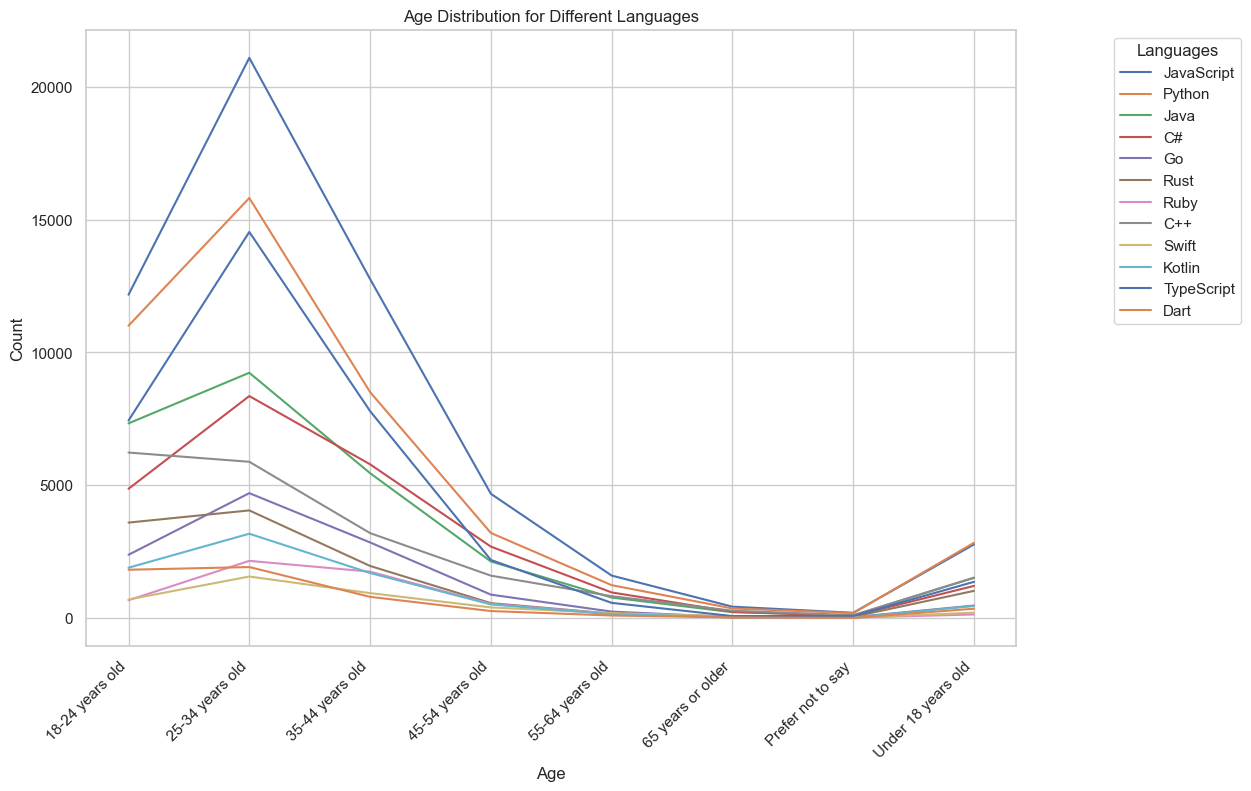

In [10]:
# Set seaborn style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a line chart for the age distribution of each language
plt.figure(figsize=(12, 8))
plt.title('Age Distribution for Different Languages')
plt.xlabel('Age')
plt.ylabel('Count')

# Iterate over each language group
for index, row in final_df.iterrows():
    language = row['LanguageHaveWorkedWith']
    
    # Filter the original DataFrame for the current language
    language_df = df[df['LanguageHaveWorkedWith'].apply(lambda x: language in x if isinstance(x, list) else False)]

    # Count the occurrences of each age
    age_counts = language_df['Age'].value_counts().sort_index()

    # Plot a line for each language
    plt.plot(age_counts.index, age_counts.values, label=language)

# Add legend to the plot
plt.legend(title='Languages', loc='upper right', bbox_to_anchor=(1.25, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [11]:
# Create a DataFrame to store age distribution for each language
edlevel_distribution_df = pd.DataFrame()

# Iterate over each language group
for index, row in final_df.iterrows():
    language = row['LanguageHaveWorkedWith']
    
    # Filter the original DataFrame for the current language
    language_df = df[df['LanguageHaveWorkedWith'].apply(lambda x: language in x if isinstance(x, list) else False)]

    # Get age distribution for the current language
    edlevel_counts = language_df['EdLevel'].value_counts().reset_index()
    edlevel_counts.columns = ['EdLevel', 'Count']
    
    # Add a column for the language
    edlevel_counts['Language'] = language
    
    # Append to the main edlevel_distribution_df
    edlevel_distribution_df = pd.concat([edlevel_distribution_df, edlevel_counts], ignore_index=True)

# Pivot the DataFrame to have age as columns
edlevel_distribution_pivot = edlevel_distribution_df.pivot(index='Language', columns='EdLevel', values='Count')

# Fill NaN values with 0
edlevel_distribution_pivot = edlevel_distribution_pivot.fillna(0)

# Add an "Overall" row to the first table
edlevel_distribution_pivot.loc['Overall'] = edlevel_distribution_pivot.sum()

# Calculate percentages for each language
age_distribution_percentage = edlevel_distribution_pivot.div(edlevel_distribution_pivot.sum(axis=1), axis=0) * 100

# Merge count and percentage tables with percentages in float format (2 decimal places)
merged_table = edlevel_distribution_pivot.astype(int).astype(str) + ' (' + age_distribution_percentage.round(2).astype(str) + '%)'

# Overall age distribution
overall_age_distribution = df['EdLevel'].value_counts().reset_index()
overall_age_distribution.columns = ['EdLevel', 'Overall Count']

# Display merged table with counts and percentages in brackets
print("Age Distribution for Each Language:")
print(tabulate(merged_table, headers='keys', tablefmt='psql'))



Age Distribution for Each Language:
+------------+---------------------------------------+------------------------------------------------+---------------------------------------------------+-----------------------------+--------------------------------------------------+--------------------------------------------------------------------------------------+----------------------------------------------------------+------------------+
| Language   | Associate degree (A.A., A.S., etc.)   | Bachelor’s degree (B.A., B.S., B.Eng., etc.)   | Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   | Primary/elementary school   | Professional degree (JD, MD, Ph.D, Ed.D, etc.)   | Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   | Some college/university study without earning a degree   | Something else   |
|------------+---------------------------------------+------------------------------------------------+---------------------------------------------------+-----

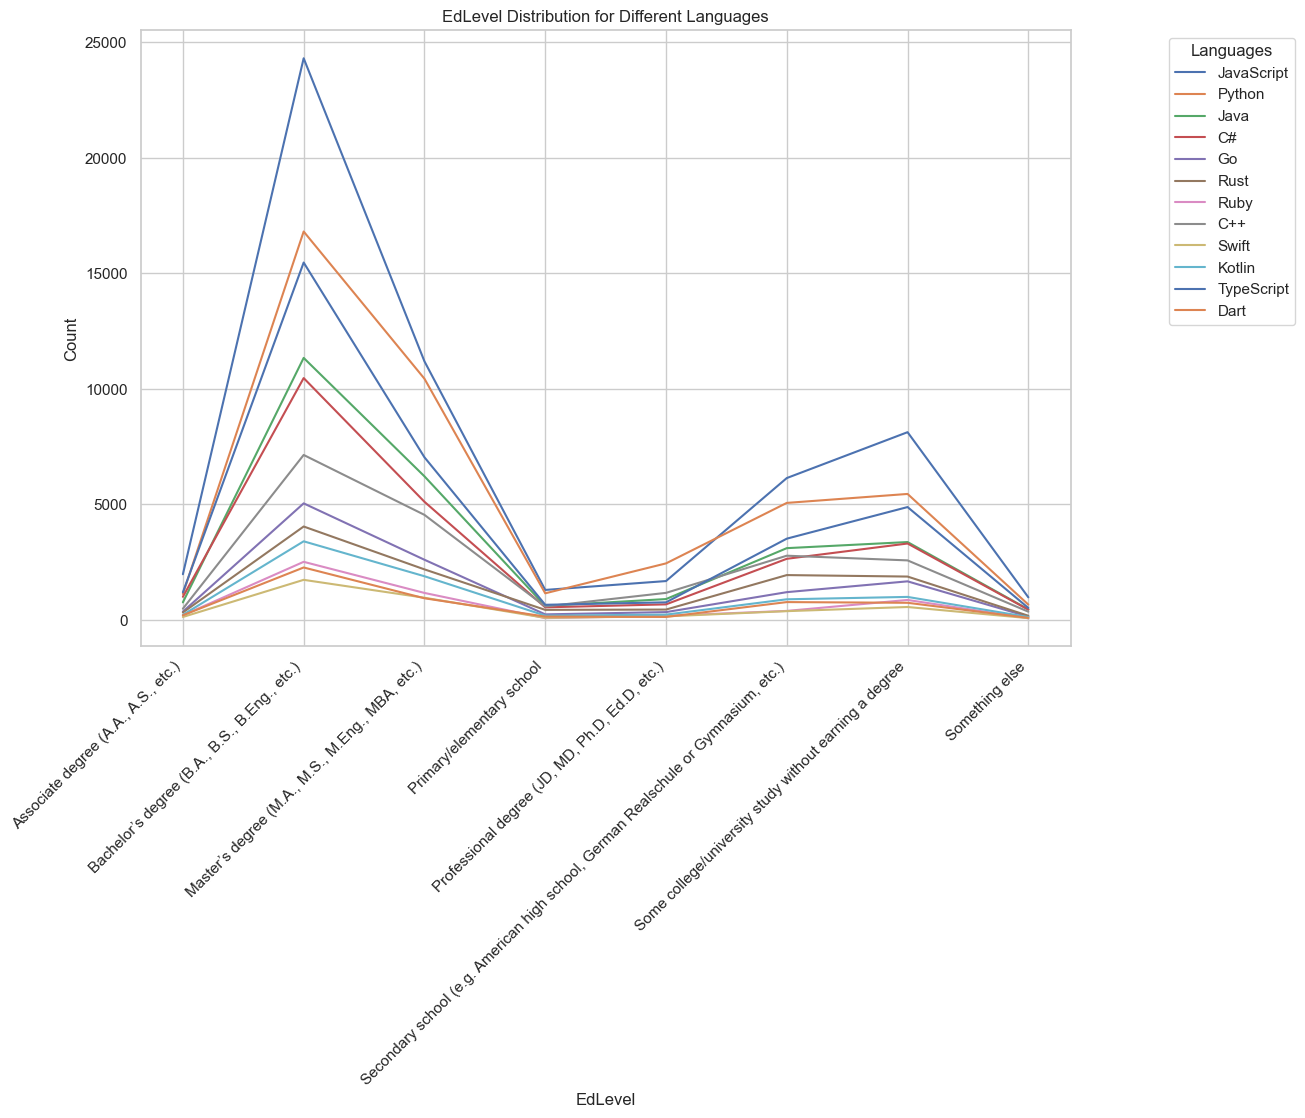

In [12]:
# Set seaborn style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a line chart for the EdLevel distribution of each language
plt.figure(figsize=(12, 8))
plt.title('EdLevel Distribution for Different Languages')
plt.xlabel('EdLevel')
plt.ylabel('Count')

# Iterate over each language group
for index, row in final_df.iterrows():
    language = row['LanguageHaveWorkedWith']
    
    # Filter the original DataFrame for the current language
    language_df = df[df['LanguageHaveWorkedWith'].apply(lambda x: language in x if isinstance(x, list) else False)]

    # Count the occurrences of each EdLevel
    edlevel_counts = language_df['EdLevel'].value_counts().sort_index()

    # Plot a line for each language
    plt.plot(edlevel_counts.index, edlevel_counts.values, label=language)

# Add legend to the plot
plt.legend(title='Languages', loc='upper right', bbox_to_anchor=(1.25, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


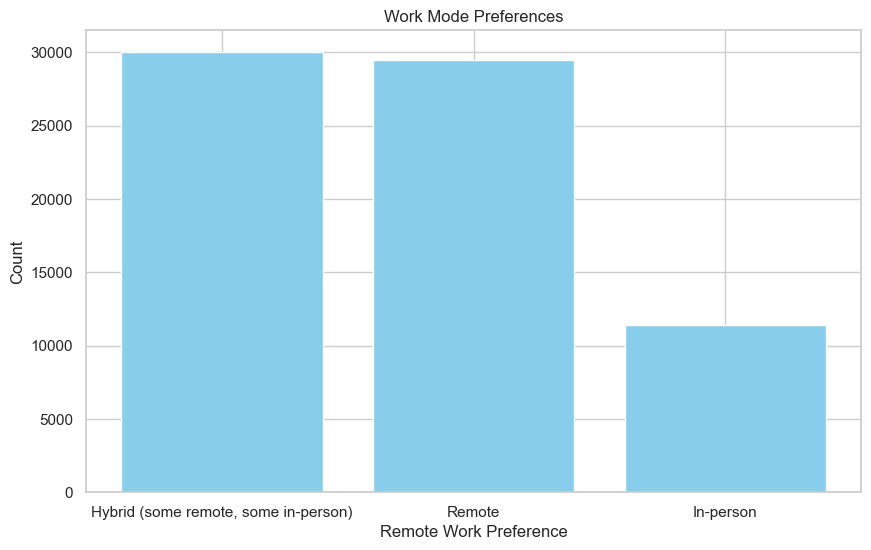

In [13]:
# Set seaborn style for better aesthetics (optional)
sns.set(style="whitegrid")

# Count the occurrences of each remote work preference
remote_work_counts = df['RemoteWork'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(remote_work_counts.index, remote_work_counts.values, color='skyblue')

# Add labels and title
plt.title('Work Mode Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')

# Show the plot
plt.show()


In [14]:
# Save the final_df DataFrame to a compressed CSV file (e.g., CSV with gzip compression)
final_df.to_csv('../../assets/so/processed_so_data.csv.gz', index=False, compression='gzip')